# Áp dụng K-Means vào bài toán phân khúc khách hàng

Phân khúc khách hàng của một nhà phân phối bán buôn dựa trên chi tiêu hàng năm của họ cho các danh mục sản phẩm đa dạng: sữa, hàng tạp hóa, khu vực,...

### Tìm hiểu dữ liệu

In [1]:
import pandas as pd

#load dữ liệu và xem qua 5 hàng đầu tiên
data = pd.read_csv("E:/Wholesale customers data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Mỗi hàng đc mô tả bởi 8 đặc trưng gồm: Channel, Region, Milk, Grocery, Detergents_Paper, Delicassen.

In [2]:
data.shape

(440, 8)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


Tập dữ liệu bao gồm 2 cột về channel và region và 6 danh mục sản phẩm: 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper' và 'Delicatessen'. Không có giá trị nào NULL. Định dạng đều là numerical.

In [4]:
# thống kê
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
#data.median()

Channel                1.0
Region                 3.0
Fresh               8504.0
Milk                3627.0
Grocery             4755.5
Frozen              1526.0
Detergents_Paper     816.5
Delicassen           965.5
dtype: float64

### Tiền xử lý dữ liệu

Các biến như Channel và Region có độ lớn thấp trong khi các biến như Fresh, Milk, Grocery, v.v. có độ lớn cao hơn. Các cột Channel, Region không cung cấp thông tin về chi tiêu, không phù hợp với mục tiêu bài toán đặt ra => Xóa. 

In [6]:
#Xóa các cột Channel và Region
df = data.drop(['Region', 'Channel'], axis = 1)
df.shape

(440, 6)

Vì K-Means là một thuật toán dựa trên khoảng cách, phạm vi dữ liêu biến thiên, sự khác biệt về độ lớn giưa các biến có thể gây ảnh hưởng đến kết quả phân cụm. => đưa tất cả các biến về cùng độ lớn (magnitude) bằng cách scale dữ liệu (data scaling)

In [7]:
# standardizing the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#fit vào dữ liệu và transform
df_scaled = scaler.fit_transform(df)

# statistics of scaled data
pd.DataFrame(df_scaled).describe()

,0,1,2,3,4,5
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,0.106977,0.078173,0.085671,0.050078,0.070510,0.031745
std,0.112774,0.100491,0.102430,0.079789,0.116790,0.058826
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.027863,0.020124,0.023174,0.011788,0.006216,0.008453
50%,0.075802,0.048636,0.051225,0.024670,0.019927,0.020077
75%,0.150968,0.097154,0.114821,0.058005,0.095997,0.037907
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Giảm chiều dữ liệu (PCA)

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
df_reduced = pca.fit_transform(df_scaled)


print(df_reduced)


[[ 2.04458516e-02 -4.12432441e-03]
 [ 4.50032876e-02 -3.68885887e-02]
 [ 4.04741364e-02 -1.37459744e-02]
 [-9.22945828e-02  2.87862771e-02]
 [-2.05136946e-02  1.06330131e-01]
 [-1.73601626e-02 -2.63839647e-02]
 [-2.02663728e-02 -2.75686539e-02]
 [ 1.34428642e-02 -4.19964429e-02]
 [-4.33457440e-02 -6.89173239e-02]
 [ 1.77908992e-01 -5.74558336e-02]
 [ 7.91302688e-02 -6.76192459e-02]
 [-9.09981700e-02 -1.08074382e-02]
 [ 8.30153765e-02  1.52954330e-01]
 [ 1.04032659e-01  5.58561642e-02]
 [ 8.45682206e-02  8.44283320e-02]
 [-8.82149773e-02 -4.14339105e-02]
 [ 7.37814710e-02 -1.03489144e-01]
 [-6.19167026e-02 -3.94995869e-02]
 [ 1.70659505e-02  5.42715317e-02]
 [-1.87851469e-02 -5.99249508e-02]
 [-3.85352174e-02  3.12438135e-02]
 [-1.10248319e-01 -5.60456803e-02]
 [-5.56739412e-02  1.94613953e-01]
 [ 3.37764332e-01  2.62949774e-01]
 [ 9.38395372e-02  1.04904285e-01]
 [ 2.74289960e-03 -6.31904112e-04]
 [-1.06667964e-01 -2.24006406e-02]
 [-1.09334014e-01 -7.45248078e-03]
 [ 3.08939116e-01 -3

In [9]:
df_reduced.shape

(440, 2)

In [10]:
ps = pd.DataFrame(df_reduced)
ps.head()

,0,1
0,0.020446,-0.004124
1,0.045003,-0.036889
2,0.040474,-0.013746
3,-0.092295,0.028786
4,-0.020514,0.106330


### Triển khai K-Means

In [11]:
#chọn số cụm k
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

WCSS = []
for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(df_reduced)
    WCSS.append(kmeans.inertia_)


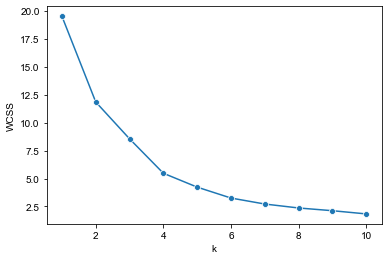

In [12]:
# trực quan kết quả lên đồ thị
import seaborn as sns
sns.lineplot(x=range(1,11), y=WCSS, marker='o')
sns.set(rc = {'figure.figsize':(10,6)})
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()

In [13]:
from sklearn.metrics import silhouette_score

k = [2, 3, 4,5]
print("Áp dụng phương pháp Silhouette:\n")
for n_clusters in k: 
    cluster = KMeans(n_clusters = n_clusters) 
    cluster_labels = cluster.fit_predict(df_reduced) 
    silhouette_avg = silhouette_score(df_reduced, cluster_labels)
    print("k =", n_clusters, 
          "=> Silhouette_score:", silhouette_avg) 

Áp dụng phương pháp Silhouette:

k = 2 => Silhouette_score: 0.6206142183312632
k = 3 => Silhouette_score: 0.46474022170625345
k = 4 => Silhouette_score: 0.51113199467256
k = 5 => Silhouette_score: 0.4544141661541595


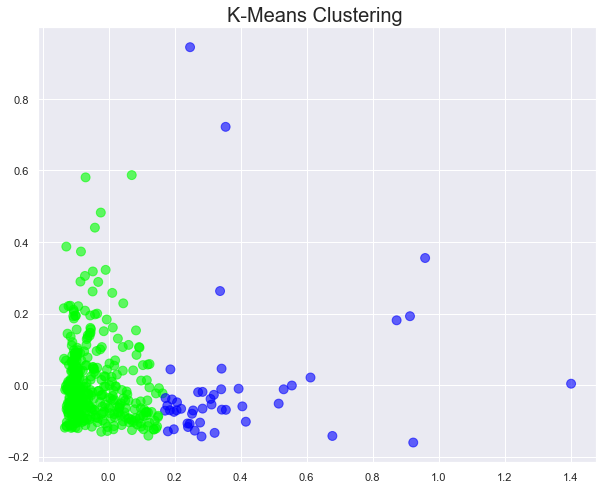

In [39]:
#K Means Clustering
#tạo kmeans model với 2 cụm
kmean = KMeans(n_clusters=2, random_state=0).fit(df_reduced)
y_kmeans = kmean.predict(df_reduced)
lab = kmean.labels_

plt.figure(figsize=(10,8))
plt.title("K-Means Clustering ",fontsize=20)
plt.scatter(ps[0], ps[1],c = y_kmeans, s=80, 
            cmap='brg',alpha=0.6,marker='o')
plt.show()

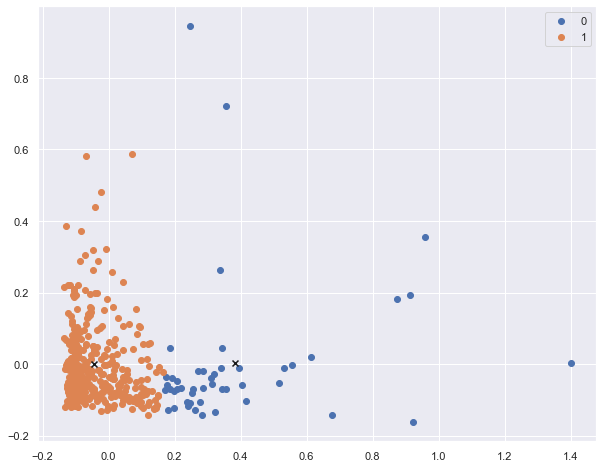

In [37]:
import numpy as np
import matplotlib.pyplot as plt
centers = np.array(kmean.cluster_centers_)
label = kmean.fit_predict(df_reduced)
plt.figure(figsize=(10,8))
uniq = np.unique(label)
for i in uniq:
    plt.scatter(df_reduced[label == i , 0] , df_reduced[label == i , 1] , label = i)
    
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()

### Quan sát và phân tích kết quả